<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module2-join-datasets/LS_DS_122_Join_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join datasets

Objectives
- concatenate data with pandas
- merge data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Combine Data Sets: Standard Joins
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [24]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-01-15 22:21:03--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  48.0MB/s    in 4.3s    

2019-01-15 22:21:12 (45.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [25]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [26]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


## Goal: Reproduce this example

The first two orders for user id 1:

In [27]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [28]:
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [29]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
print(aisles.head())

(134, 2)
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [30]:
display(example)
# no columns we need

### departments

In [31]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
print(departments.head())

(21, 2)
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [0]:
# no columns we need

### order_products__prior

In [33]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
print(order_products__prior.head())

(32434489, 4)
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


In [0]:
# this one has order_id, product_id, add_to_cart_order

### order_products__train

In [35]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
print(order_products__train.head())

(1384617, 4)
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


In [0]:
# same columns as the previous df

### orders

In [37]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
print(orders.head())

(3421083, 7)
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [0]:
# This has user_id, order_id, order_number, order_dow, order_hour_of_day

### products

In [39]:
products = pd.read_csv('products.csv')
print(products.shape)
print(products.head())

(49688, 4)
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [0]:
# products has product_id, product_name

## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])

In [42]:
order_products.shape, order_products__prior.shape, order_products__train.shape

((33819106, 4), (32434489, 4), (1384617, 4))

## Get a subset of orders — the first two orders for user id 1

In [0]:
# From orders df, get user_id, order_id, order_number, order_row, order_hour_of_day

condition = (orders.user_id==1) & (orders.order_number <= 2)

columns = ['user_id', 
           'order_id', 
           'order_number', 
           'order_dow', 
           'order_hour_of_day']

subset = orders.loc[condition, columns]

## Merge dataframes

In [0]:
columns = ['order_id', 'add_to_cart_order', 'product_id']

merged = pd.merge(subset, order_products[columns],
                 how='inner', on='order_id')

In [45]:
subset.shape, merged.shape

((2, 5), (11, 7))

In [46]:
subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [47]:
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [48]:
display(example)

# Assignment

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Stretch challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

In [0]:
# We need the columns that will tell us how many
# times each product was ordered

# Get product id for each of the top 10 products
# see how many times each product_id appears in the data

# Or we can get frequency counts of top 10

# order_products__prior has product_ids
# order_products__train has them too
# We already have a dataframe with both of them

In [50]:
# Check for nulls

order_products.isnull().values.any()

False

In [51]:
# Top 10 counts from __prior

order_products.product_id.value_counts()[0:10]

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [52]:
# Let's throw the products in there

joined_df = order_products.merge(products, on='product_id')
joined_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [54]:
# Top 10

joined_df.product_name.value_counts()[0:10].plot

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

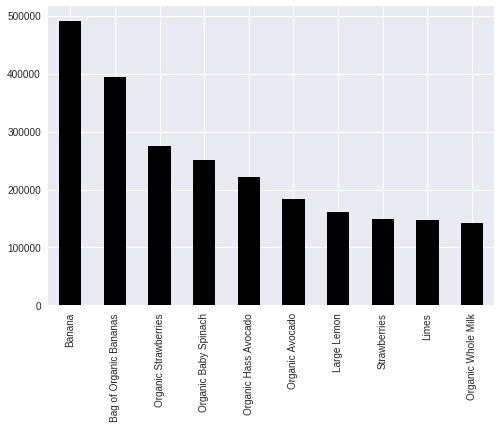

In [61]:
# Top 10 visualized

joined_df.product_name.value_counts()[:10].plot(kind="bar", color='black');

In [0]:
# Strech

In [0]:
# Reproduce the list of the top 25 latest ordered popular products
# products with more than 2,900 orders

# Let's get order hour of day into a new merged dataframe
# Merge on order_id should work

final_df = joined_df.merge(orders, on='order_id')

# New frame with boolean of popular or not

g_frame = (final_df.product_name.value_counts() > 2900).to_frame()
g_frame.reset_index(inplace=True)
g_frame.columns = ['product_name', 'popular_or_not']
g_frame.head()

# Merge it in

last_df = final_df.merge(g_frame, on='product_name')
last_df.head

In [0]:
# Now get the top 25 most bought product names where popular_or_not_y is True